In [1]:
from comptox_analysis.highlighting.highlighting_atoms import highlighter
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [2]:
df=PandasTools.LoadSDF('caco2.sdf',smilesName='Smiles')

In [3]:
def fingerprints_inputs2(dataframe):
        X=np.array([GetMorganFingerprintAsBitVect(mol,radius=2,nBits=2048,useFeatures=True) for mol in [Chem.MolFromSmiles(m) for m in list(dataframe.Smiles)]])
        y=dataframe.activity.astype('float')
        return X,y

X,y=fingerprints_inputs2(df)

In [4]:
model=RandomForestRegressor(random_state=46).fit(X,y)

In [5]:
columns=[f'fp_{i}' for i in range(2048)]

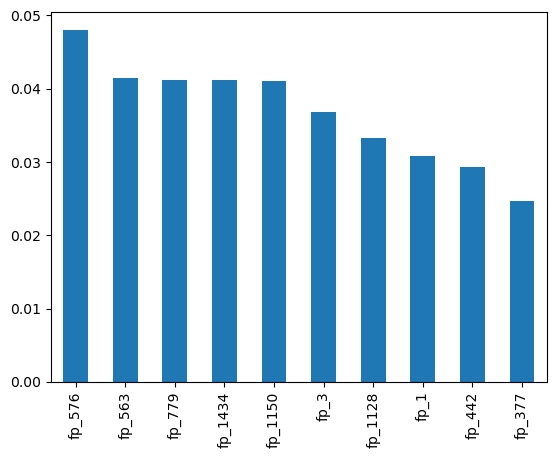

In [6]:
imp=pd.Series(data=model.feature_importances_,index=columns).sort_values(ascending=False)
imp[:10].plot.bar();

In [7]:
df_fp=pd.DataFrame(X,columns=columns)

indexes=df_fp[(df_fp.fp_576==1)&(df_fp.fp_779==1)].index.values

In [8]:
mols=df.loc[indexes,'Smiles'].tolist()

In [9]:
highlighter_instance=highlighter(mols)

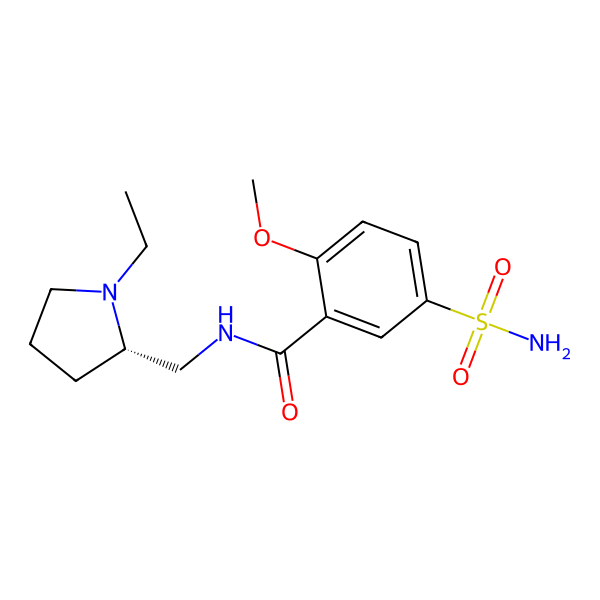

In [10]:
highlighter_instance.render_image(number=0,indexes=False)

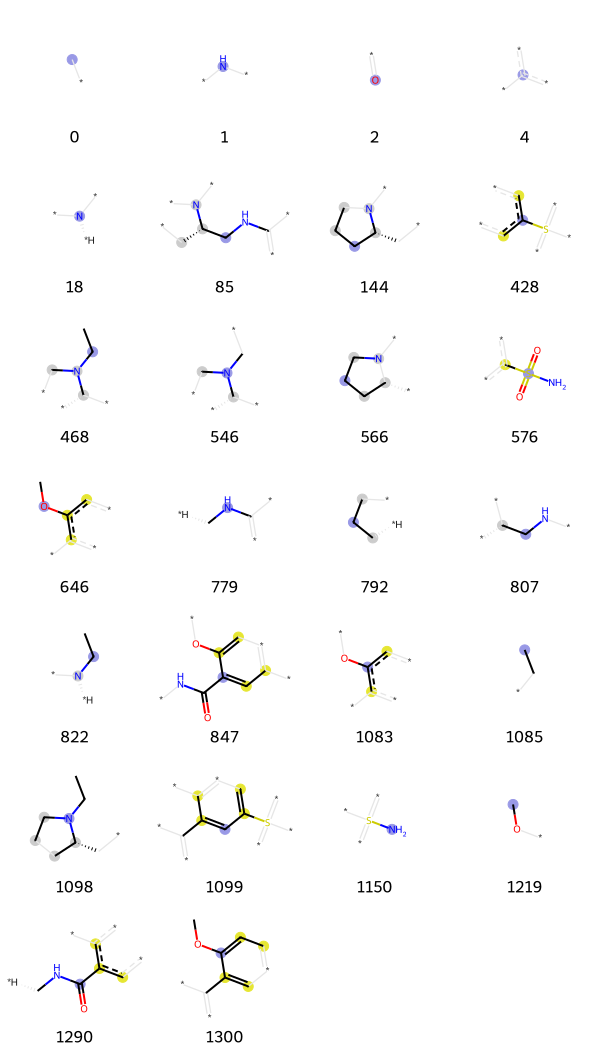

In [11]:
highlighter_instance.fragmentation(type='morgan',n=26,number=0)[0] #you can also introduce a dictionary with fp hyperparameters, for example --> hyper_finger={'radius':2 , 'nBits':2048}

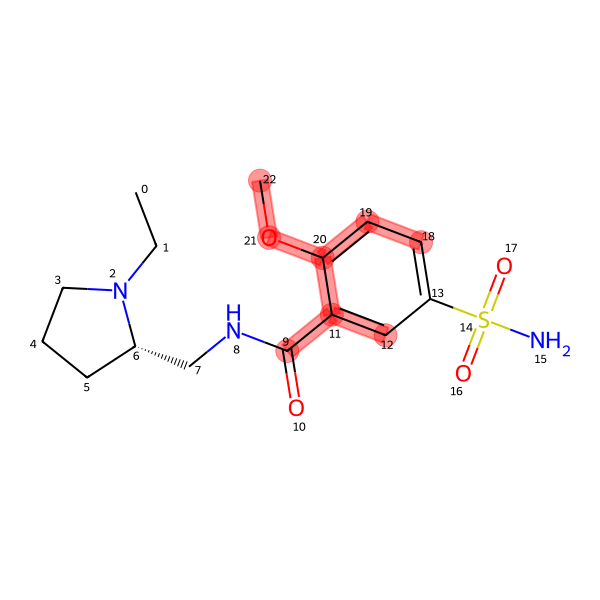

In [12]:
highlighter_instance = highlighter([mols[0]])

highlighter_instance.highlighting(type='morgan',fingerprint_numbers=[[1300]])

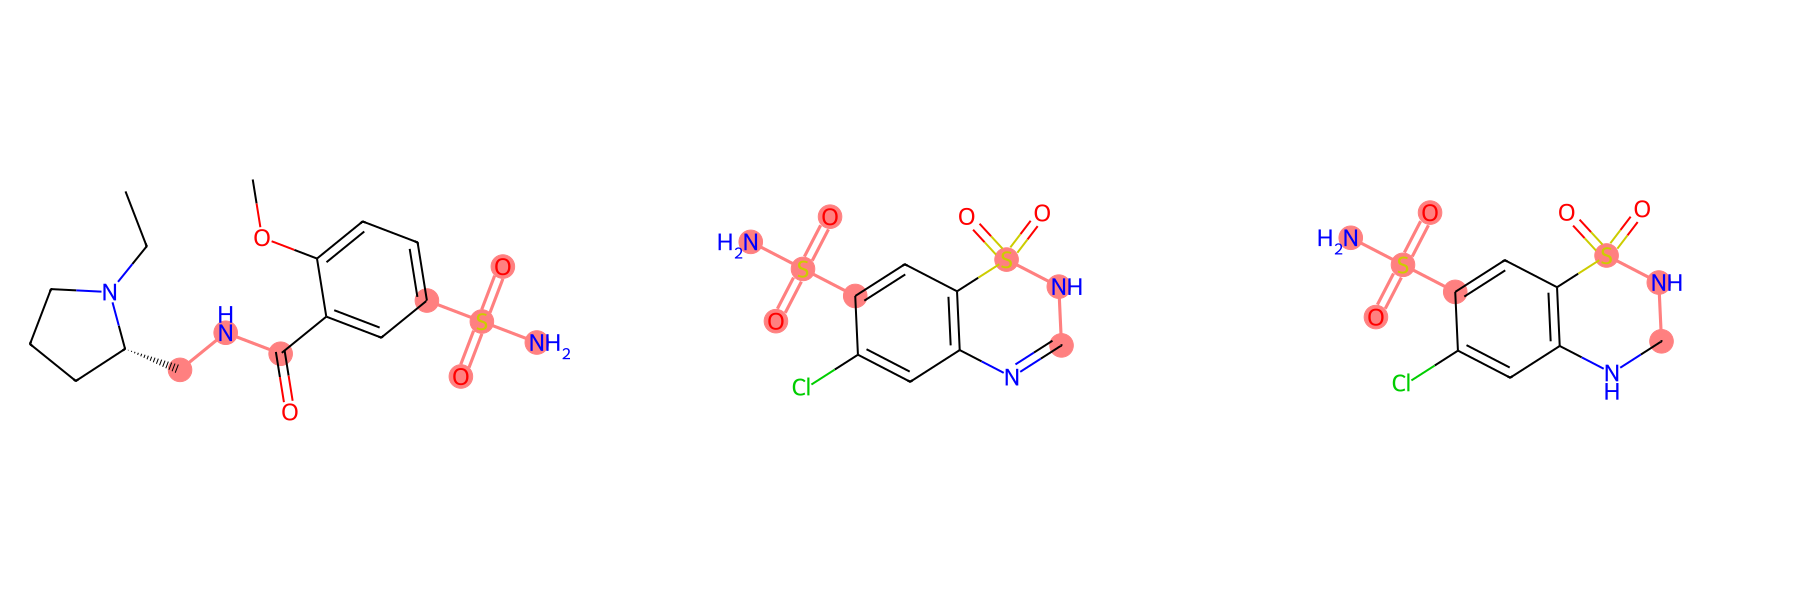

In [13]:
highlighter_instance = highlighter(mols)

highlighter_instance.highlighting(fingerprint_numbers=[[576,779],[576,779],[576,779]])